# Pymaceuticals Inc.
---

### Analysis

- Looking at the Summary Statistics, we can see that the Mean Tumor Volume for most drug regimens do not differ too much from placebo (54.03 mm3), except for Capomulin (40.68 mm3) and Ramicane (40.22 mm3). These seem like good candidates.
- This seems to be supported by the bar graph, with those two drugs clearly having the highest number of observed mouse timepoints. This means that mice treated with Capomulin and Ramicane lived significantly longer than mice treated with other drug regimens.
- The pie graph shows a near even distribute of female and male rats in the study.
- The boxplot again supports the effectiveness of Capomulin and Ramicane, both of which have final tumor volumes significantly lower than Infubinol and Ceftamin, though Infubinol does have one outlier on par with the superior Capomulin and Ramicane.
- I generated a line plot for Mouse b128, which showed a series of tumor growth followed by greater tumor reduction. Tumor volume was reduced from a starting point of 45 mm3 to around 38 mm3 at 35 days, though the tumor seems to have resumed growing from day 35 to 45.
- Looking at the scatter plot, correlation coefficient, and linear regression model, there appears to be a strong correlation between average tumor volume and mouse weight of mice on the Capomulin regimen. With a correlation coefficient of 0.84, the clear positive trend is discernable even without the regression line. However, though there is a strong correlation between the two, it remains to be seen if obese rats are more likely to have more tumor growth, or if larger tumors just make the mice heavier.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, 
                    how="outer", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [ ]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
df[df.duplicated()]["Mouse ID"]

587    g989
Name: Mouse ID, dtype: object

In [ ]:
# Optional: Get all the data for the duplicate mouse ID.
df[df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_df = df[df["Mouse ID"] != "g989"]
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [11]:
# Checking the number of mice in the clean DataFrame.
study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = study_df["Tumor Volume (mm3)"].groupby(study_df["Drug Regimen"]).mean()
median = study_df["Tumor Volume (mm3)"].groupby(study_df["Drug Regimen"]).median()
variance = study_df["Tumor Volume (mm3)"].groupby(study_df["Drug Regimen"]).var()
stddev = study_df["Tumor Volume (mm3)"].groupby(study_df["Drug Regimen"]).std()
sem = study_df["Tumor Volume (mm3)"].groupby(study_df["Drug Regimen"]).sem()
drug_tumor_summary_df = pd.DataFrame({"Mean Tumor Volume":mean,
                                      "Median Tumor Volume":median,
                                      "Tumor Volume Variance":variance,
                                      "Tumor Volume Std. Dev.":stddev,
                                      "Tumor Volume Std. Err.":sem})
drug_tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Group and sort # of Observed Mouse Timepoints by Drug Regimen for plots
regimen_count = study_df["Mouse ID"].groupby(study_df["Drug Regimen"]).count().sort_values(ascending=False)
regimen_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

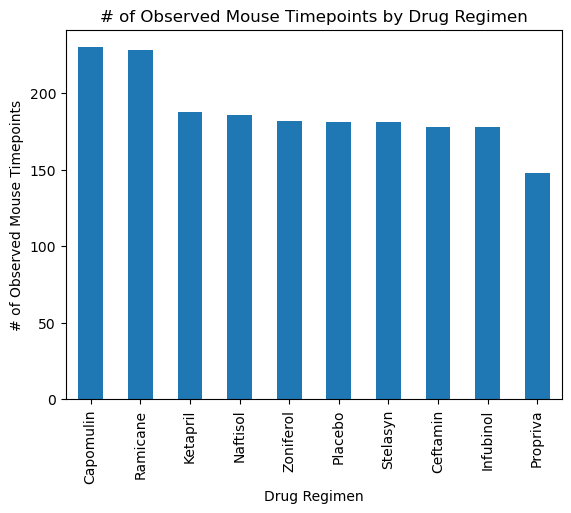

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count.plot(kind="bar")
plt.title("# of Observed Mouse Timepoints by Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

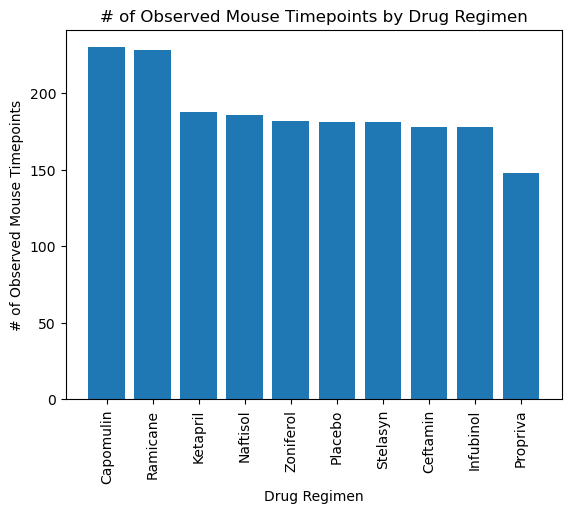

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_count.keys(), regimen_count.values)
plt.title("# of Observed Mouse Timepoints by Drug Regimen")
plt.xticks(rotation="vertical")
plt.xlabel(regimen_count.index.name)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [21]:
# Group and count unique mice by sex for plots
sex_count = study_df["Mouse ID"].groupby(study_df["Sex"]).nunique()
sex_count

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

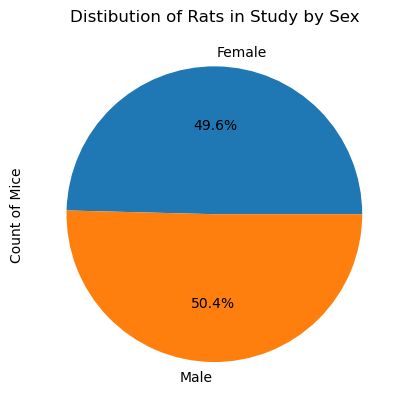

In [23]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_count.plot(kind="pie", title="Distibution of Rats in Study by Sex", autopct="%1.1f%%")
plt.ylabel("Count of Mice")
# Make the pie chart
plt.show()

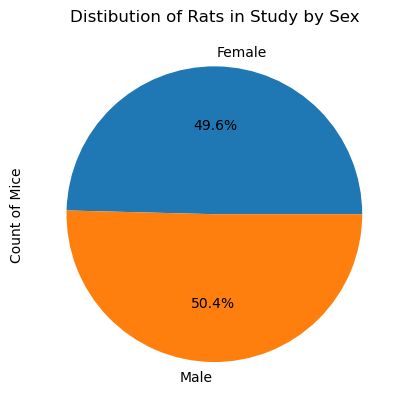

In [25]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(sex_count, labels=sex_count.keys(), autopct="%1.1f%%")
plt.title("Distibution of Rats in Study by Sex")
plt.ylabel("Count of Mice")
# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
select_drug_df = study_df[study_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
final_treatment_df = pd.DataFrame(study_df.groupby("Mouse ID")["Timepoint"].max().reset_index())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(final_treatment_df, select_drug_df[["Mouse ID", "Timepoint","Tumor Volume (mm3)", "Drug Regimen"]], on=["Mouse ID", "Timepoint"])
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [153]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = (merged_df["Drug Regimen"].unique()).tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_list:
    target = merged_df[merged_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    quartiles = target.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Locate the rows which contain mice on each drug and get the tumor volumes and add to tumor vol list
    tumor_vol.append({"Drug": drug, "Tumor Volume": target})

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_volume = merged_df[(target < lower_bound) | (merged_df["Tumor Volume (mm3)"] > upper_bound)].value_counts()
    print(f"{drug}'s potential outliers: {outlier_volume}")

Infubinol's potential outliers: Mouse ID  Timepoint  Tumor Volume (mm3)  Drug Regimen
c326      5          36.321346           Infubinol       1
Name: count, dtype: int64
Ceftamin's potential outliers: Series([], Name: count, dtype: int64)
Ramicane's potential outliers: Series([], Name: count, dtype: int64)
Capomulin's potential outliers: Series([], Name: count, dtype: int64)


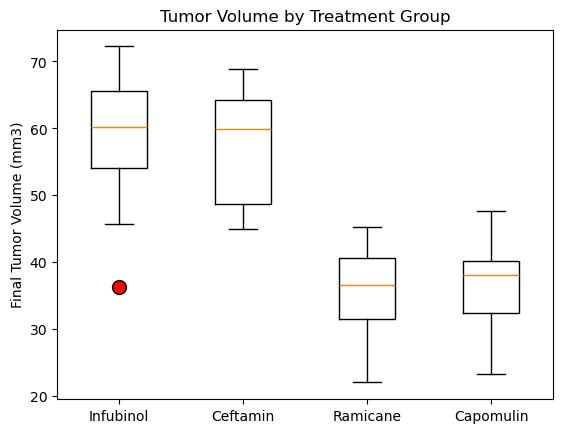

In [31]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
labels = [d["Drug"] for d in tumor_vol]
values = [d["Tumor Volume"] for d in tumor_vol]
plt.boxplot(values, labels=labels, flierprops={"markerfacecolor":"r", "markersize":10})
plt.title("Tumor Volume by Treatment Group")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

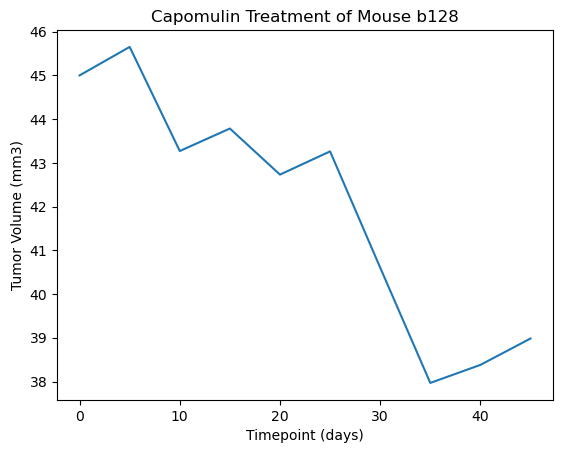

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = study_df[study_df["Drug Regimen"] == "Capomulin"]
line_mouse = capomulin_df[capomulin_df["Mouse ID"] == (capomulin_df["Mouse ID"].iloc[0])]
plt.plot(line_mouse["Timepoint"], line_mouse["Tumor Volume (mm3)"])
plt.title(f"Capomulin Treatment of Mouse {capomulin_df["Mouse ID"].iloc[0]}")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

In [147]:
# Create DataFrame with Mouse ID, Weight, and Average Tumor Volume for scatter plot
scatter_df = capomulin_df.groupby("Mouse ID", as_index=False).first()[["Mouse ID", "Weight (g)"]]
scatter_df["Average Tumor Volume (mm3)"] = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().to_list()
scatter_df.head()

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


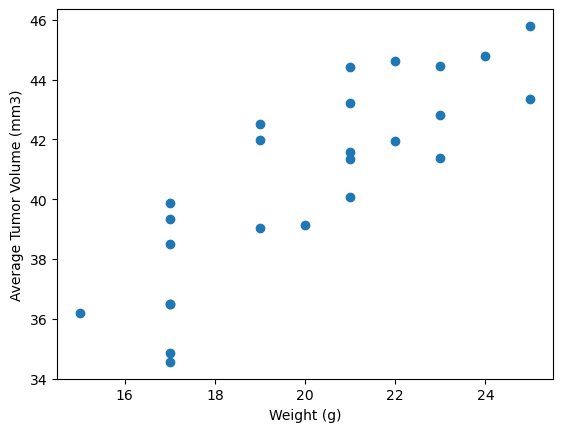

In [149]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = scatter_df["Weight (g)"]
tumor_avg = scatter_df["Average Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_avg)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


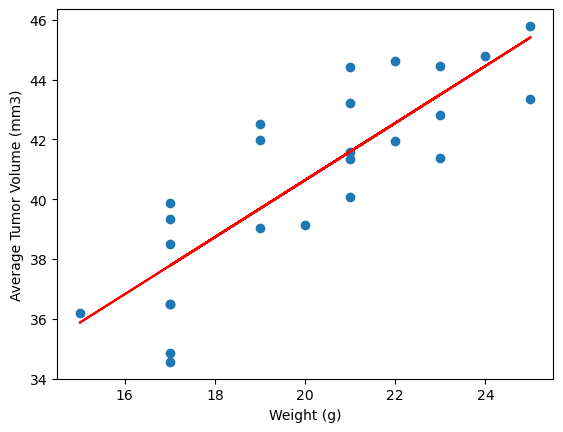

In [151]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight,tumor_avg)[0],2)}")
wt_slope, wt_int, wt_r, wt_p, wt_std_err = st.linregress(mouse_weight, tumor_avg)
wt_fit = wt_slope * mouse_weight + wt_int
plt.scatter(mouse_weight, tumor_avg)
plt.plot(mouse_weight, wt_fit, color="r")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.show()